In [63]:
import numpy
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, LSTM, Concatenate, Merge, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import plot_model

from sklearn import preprocessing as sk_prep

In [64]:
numpy.random.seed(10)
tknzr = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=" ",char_level=False)

from sklearn.feature_extraction.text import TfidfVectorizer as vx
from pandas import DataFrame as df
from keras.optimizers import SGD, Adam
import math
# from sklearn.feature_extraction.text import CountVectorizer as vx

min_max = sk_prep.MinMaxScaler()
min_max_op = sk_prep.MinMaxScaler(feature_range=(-1,1))

#load from file
data_set = df.from_csv('./scraper/data_set.csv')
data_set.fillna(0)
sentences = data_set['full_message']
y = data_set['tp_bsc_pc']
y = y.fillna(0)

x2 = numpy.array(data_set[['border_level_width', 'border_msg_count']].fillna(0))

# scale inputs using min-max scaling

x2 = min_max.fit_transform(x2)
y_new = []
#for i in y:
#    y_new.append(pad_sequences([[int(x) for x in list('{0:0b}'.format(math.floor(i)))]], maxlen=15, dtype='int32', padding='pre', truncating='pre', value=0)[0])
#y = numpy.array(y_new)
print(y.shape)
y = y.reshape(-1,1)
print(y)
y = min_max_op.fit_transform(y).reshape(1,-1)[0]
print(y)
print(y.shape)
# apply preprocess

#vectorize
tknzr.fit_on_texts(sentences)
vectors = tknzr.texts_to_sequences(sentences)
vector = tknzr.texts_to_matrix(sentences)
top_words = vector.shape[1]
x1 = pad_sequences(vectors, maxlen=25, dtype='float64', padding='post', truncating='post', value=0.)
# vectors = numpy.array(vectors)
# vectors = numpy.array([numpy.array(x) for x in vectors])
x1 = min_max.fit_transform(x1)
#add padding

/home/ashish/.virtualenvs/python-tf/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:30: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


(2877,)
[[ 1159.95]
 [ 1441.95]
 [  462.7 ]
 ..., 
 [  168.95]
 [ 1112.35]
 [   70.  ]]
[-0.96325924 -0.95432704 -0.98534424 ..., -0.9946486  -0.96476694
 -0.99778279]
(2877,)


/usr/lib/python3.6/site-packages/ipykernel/__main__.py:16: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
merge_34 (Merge)             (None, 315)               0         
_________________________________________________________________
dense_158 (Dense)            (None, 300)               94800     
_________________________________________________________________
dense_159 (Dense)            (None, 1)                 301       
Total params: 403,311
Trainable params: 403,311
Non-trainable params: 0
_________________________________________________________________
None


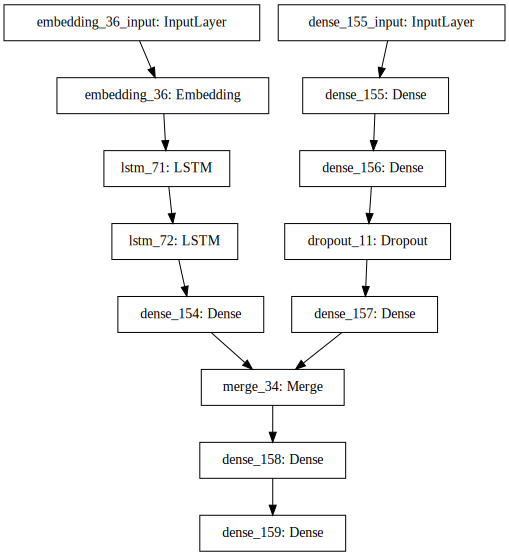

In [72]:
model1 = Sequential()
model1.add(Embedding(top_words, 15, input_length=25))
model1.add(LSTM(units=100, return_sequences=True))
model1.add(LSTM(units=100, recurrent_dropout=0.1))
model1.add(Dense(300, activation='tanh'))


model2 = Sequential()
model2.add(Dense(100, input_shape=(2,)))
model2.add(Dense(300, activation='tanh'))
model2.add(Dropout(0.2))
model2.add(Dense(15, activation='tanh'))


model = Sequential()
model.add(Merge([model1, model2], mode='concat'))
model.add(Dense(300, activation='tanh'))
model.add(Dense(1, activation='tanh'))

opt = Adam(lr=0.001)
model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

print(model.summary())

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [73]:
history = model.fit([x1, x2], y, epochs=20, batch_size=64)
# Final evaluation of the model
scores = model.evaluate([x1, x2], y, verbose=0)
# print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/20
2877/2877 [==============================] - 16s - loss: 0.0548 - acc: 0.1738    
Epoch 2/20
2877/2877 [==============================] - 6s - loss: 0.0052 - acc: 0.1842     
Epoch 3/20
2877/2877 [==============================] - 6s - loss: 0.0052 - acc: 0.1842     
Epoch 4/20
2877/2877 [==============================] - 6s - loss: 0.0052 - acc: 0.1842     
Epoch 5/20
2877/2877 [==============================] - 6s - loss: 0.0052 - acc: 0.1842     
Epoch 6/20
2877/2877 [==============================] - 6s - loss: 0.0052 - acc: 0.1842     
Epoch 7/20
2877/2877 [==============================] - 6s - loss: 0.0052 - acc: 0.1842     
Epoch 8/20
2877/2877 [==============================] - 6s - loss: 0.0052 - acc: 0.1842     
Epoch 9/20
2877/2877 [==============================] - 6s - loss: 0.0052 - acc: 0.1842     
Epoch 10/20
2877/2877 [==============================] - 6s - loss: 0.0052 - acc: 0.1842     
Epoch 11/20
2877/2877 [==============================] - 6s - loss: 0